In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/internet_data.csv')
df2 = pd.read_csv('/content/customer_data.csv')
df3 = pd.read_excel('/content/churn_data.xlsx')


In [ ]:
df1.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
df1 = df1.drop('customerID', axis=1)

In [ ]:
df3 = df3.drop('customerID', axis=1)

In [ ]:
result = df2.join([df1, df3])

In [ ]:
result.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1.0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34.0,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2.0,Yes,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45.0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2.0,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
result.shape

(7042, 21)

In [ ]:
result.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
result.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7038.000000,7028.000000
mean,0.162170,32.359761,64.741641
std,0.368633,24.554612,30.098308
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.325000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
result.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               4
PhoneService         3
Contract             2
PaperlessBilling     3
PaymentMethod        7
MonthlyCharges      14
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

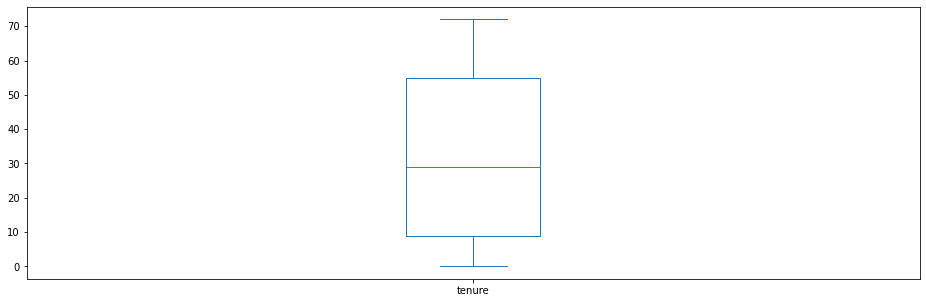

In [ ]:
result['tenure'].plot.box(figsize=(16,5))

plt.show()

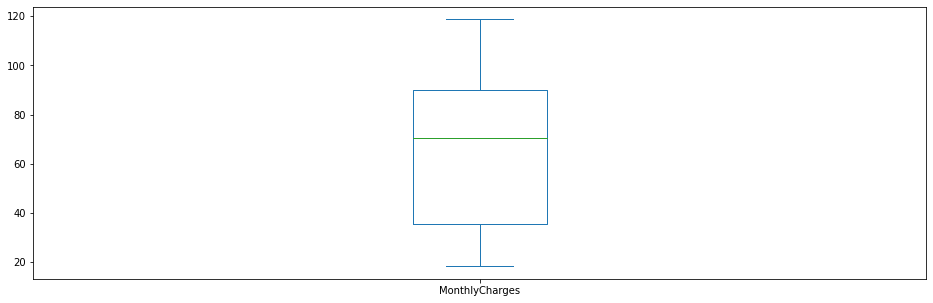

In [ ]:
result['MonthlyCharges'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
result['TotalCharges'] = pd.to_numeric(result['TotalCharges'],errors='coerce')


In [ ]:
result.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

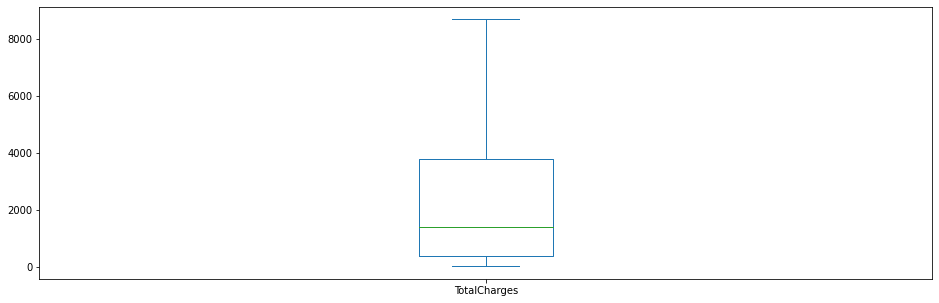

In [ ]:
result['TotalCharges'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
result['PhoneService'].fillna(result['PhoneService'].mode()[0], inplace=True)
result['Contract'].fillna(result['Contract'].mode()[0], inplace=True)
result['PaperlessBilling'].fillna(result['PaperlessBilling'].mode()[0], inplace=True)
result['PaymentMethod'].fillna(result['PaymentMethod'].mode()[0], inplace=True)
result['tenure'].fillna(result['tenure'].mean(), inplace=True)
result['MonthlyCharges'].fillna(result['MonthlyCharges'].mean(), inplace=True)
result['TotalCharges'].fillna(result['TotalCharges'].mean(), inplace=True)


In [ ]:
result.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
result.nunique()

customerID          7042
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                74
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6520
Churn                  2
dtype: int64

In [ ]:
# Find all categorical columns
cat_cols = [col for col in result.columns if result[col].dtype == 'object']

# Label encode all categorical columns
for col in cat_cols:
    labels = result[col].unique()
    mapping = {label: i for i, label in enumerate(labels)}
    result[col] = result[col].map(mapping)

# Display the encoded DataFrame
print(result)


      customerID  gender  SeniorCitizen  Partner  Dependents  MultipleLines  \
0              0       0              0        0           0              0   
1              1       1              0        1           0              1   
2              2       1              0        1           0              1   
3              3       1              0        1           0              0   
4              4       0              0        1           0              1   
...          ...     ...            ...      ...         ...            ...   
7037        7037       0              0        1           0              1   
7038        7038       1              0        0           1              2   
7039        7039       0              0        0           1              2   
7040        7040       0              0        0           1              0   
7041        7041       1              1        0           0              2   

      InternetService  OnlineSecurity  OnlineBackup

In [ ]:
result.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,29.85,29.850000,0
1,1,1,0,1,0,1,0,1,1,1,...,0,0,34.0,1,1,1,1,56.95,1889.500000,0
2,2,1,0,1,0,1,0,1,0,0,...,0,0,2.0,1,0,0,1,53.85,2282.507422,1
3,3,1,0,1,0,0,0,1,1,1,...,0,0,45.0,0,1,1,2,42.30,1840.750000,0
4,4,0,0,1,0,1,1,0,1,0,...,0,0,2.0,1,0,0,0,70.70,151.650000,1


In [ ]:
result=result.drop(['customerID'],axis=1)

In [ ]:
train_data = result.sample(frac=0.8, random_state=42)
test_data = result.drop(train_data.index)

In [ ]:
from pprint import pprint

In [ ]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


In [ ]:
def InfoGain(data,split_attribute_name,target_name="Churn"):
    total_entropy = entropy(data[target_name])
    vals,counts = np.unique(data[split_attribute_name],return_counts=True)
    #cal the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])for i in range(len(vals))])
    
    Information_Gain = total_entropy-Weighted_Entropy
    return Information_Gain 

In [ ]:
def ID3(data, originaldata, features, target_attribute_name='Churn', parent_node_class=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
     if len(np.unique(data[target_attribute_name])) <= 1:
         return np.unique(data[target_attribute_name])[0]

     elif len(data) < min_samples_split:
         return parent_node_class
     
     elif len(features) == 0 or max_depth == 0:
        return np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

     else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

     item_values = [InfoGain(data,feature,target_attribute_name)for feature in features] 
     best_feature_index = np.argmax(item_values)
     best_feature = features[best_feature_index]

     tree = {best_feature:{}}
     features = [i for i in features if i!= best_feature]
     
     for value in np.unique(data[best_feature]):
         value = value
         sub_data = data.where(data[best_feature]==value).dropna()
         subtree = ID3(sub_data,train_data,features,target_attribute_name,parent_node_class,max_depth-1, min_samples_split,min_samples_leaf)
         tree[best_feature][value] = subtree
     return(tree)

In [ ]:
def predict(query, tree, default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default

            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

In [ ]:
def test(data,tree):
   queries = data.iloc[:,:-1].to_dict(orient="records")
   predicted = pd.DataFrame(columns=["predicted"])
   for i in range(len(data)):
       predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
   print("The Prediction accuracy is:",(np.sum(predicted["predicted"]==data["Churn"])/len(data))*100,'%')
   return accuracy

In [ ]:
def evaluate_accuracy(data, model, target_attribute_name):
    predictions = predict(data, model)
    actual = data[target_attribute_name]
    accuracy = sum(predictions == actual) / len(data)
    return accuracy

In [ ]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
tree=ID3(train_data,train_data,train_data.columns[:-1],max_depth=2,min_samples_split=3,min_samples_leaf=1)
pprint (tree)
evaluate_accuracy(test_data,tree,target_attribute_name='Churn')

Streaming output truncated to the last 5000 lines.
                  70.6: 0,
                  70.75: 1.0,
                  70.8: 1.0,
                  70.9: 1.0,
                  71.0: 1.0,
                  71.1: 0,
                  71.15: 1.0,
                  71.2: 0.0,
                  71.25: 0.0,
                  71.35: 1.0,
                  71.55: 1.0,
                  71.65: 1.0,
                  72.0: 0.0,
                  72.4: 1.0,
                  73.0: 1.0,
                  73.05: 0.0,
                  73.1: 0.0,
                  73.55: 1.0,
                  73.6: 1.0,
                  73.65: 1.0,
                  74.0: 0.0,
                  74.1: 0.0,
                  74.2: 1.0,
                  74.25: 1.0,
                  74.3: {'gender': {0.0: 1.0, 1.0: 0.0}},
                  74.35: 0,
                  74.4: 1.0,
                  74.45: 1.0,
                  74.5: 1.0,
                  74.6: {'Dependents': {0.0: 1.0, 1.0: 0.0}},
           

0.2528409090909091

In [ ]:
tree=ID3(train_data,train_data,train_data.columns[:-1],max_depth=5,min_samples_split=2,min_samples_leaf=1)
pprint (tree)
evaluate_accuracy(test_data,tree,target_attribute_name='Churn')

Streaming output truncated to the last 5000 lines.
                  70.6: {'gender': {0.0: 0.0, 1.0: 1.0}},
                  70.75: 1.0,
                  70.8: 1.0,
                  70.9: 1.0,
                  71.0: 1.0,
                  71.1: {'gender': {0.0: {'SeniorCitizen': {0.0: {'Partner': {1.0: {'Dependents': {0.0: 0.0}}}}}}}},
                  71.15: 1.0,
                  71.2: 0.0,
                  71.25: 0.0,
                  71.35: 1.0,
                  71.55: 1.0,
                  71.65: 1.0,
                  72.0: 0.0,
                  72.4: 1.0,
                  73.0: 1.0,
                  73.05: 0.0,
                  73.1: 0.0,
                  73.55: 1.0,
                  73.6: 1.0,
                  73.65: 1.0,
                  74.0: 0.0,
                  74.1: 0.0,
                  74.2: 1.0,
                  74.25: 1.0,
                  74.3: {'gender': {0.0: 1.0, 1.0: 0.0}},
                  74.35: {'gender': {0.0: 0.0, 1.0: 1.0}},
         

0.2528409090909091

In [ ]:
parameter_grid = {'max_depth': [5, 10, 15],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

best_accuracy = 0
best_params = {}

for max_depth in parameter_grid['max_depth']:
    for min_samples_split in parameter_grid['min_samples_split']:
        for min_samples_leaf in parameter_grid['min_samples_leaf']:
            tree = ID3(train_data, train_data, train_data.columns[:-1], max_depth=max_depth, 
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            accuracy = evaluate_accuracy(test_data,tree,target_attribute_name='Churn')
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'max_depth': max_depth, 
                               'min_samples_split': min_samples_split, 
                               'min_samples_leaf': min_samples_leaf}
            
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
